In [1]:
import scanpy as sc 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import bbknn
sc.settings.set_figure_params(dpi_save=400, facecolor='white', fontsize=7, format='jpg')
sc.settings.verbosity = 0 

In [2]:
adata = sc.read_h5ad('../data/manual_plot4.h5ad') 
qc_adata = sc.read_h5ad('../data/qc-v4.h5ad')
adata.obs_names_make_unique()
adata.var_names_make_unique()
np.unique(adata.obs.leiden_poly)



array(['Endothelial', 'Fibroblast-like Synoviocytes', 'Fibroblasts',
       'Macrophages-M2', 'T cells', 'VSMC'], dtype=object)

In [3]:
adata = qc_adata[adata.obs['leiden_poly'].isin(
    ['VSMC'])] 
print('cells: ', adata.obs.shape[0])

cells:  4575


In [4]:
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)

/Users/ckw/opt/anaconda3/envs/ckw/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


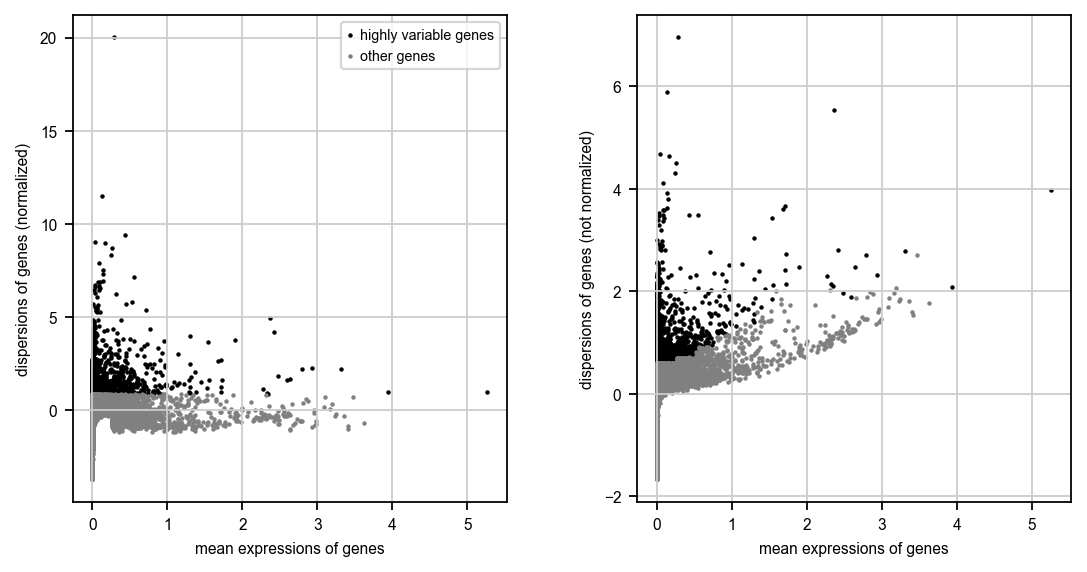

In [5]:
sc.pp.highly_variable_genes(adata, n_top_genes=3000)
sc.pl.highly_variable_genes(adata, save=True)
adata = adata[:, adata.var.highly_variable]

In [6]:
sc.pp.scale(adata, max_value=1, zero_center=False)

/Users/ckw/opt/anaconda3/envs/ckw/lib/python3.10/site-packages/scanpy/preprocessing/_simple.py:843: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


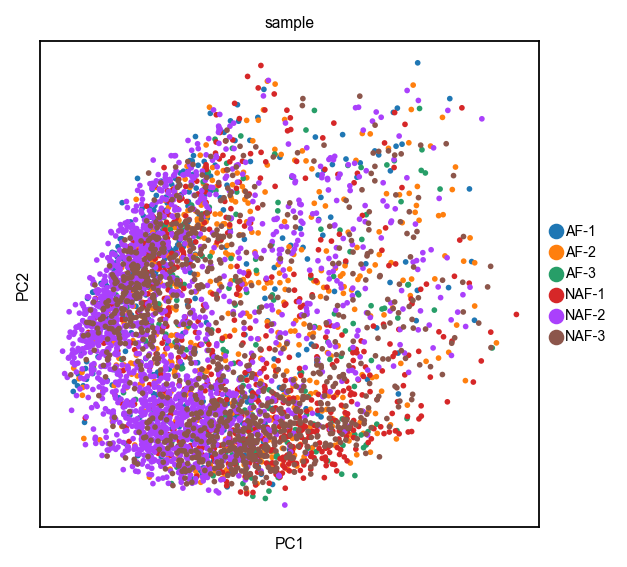

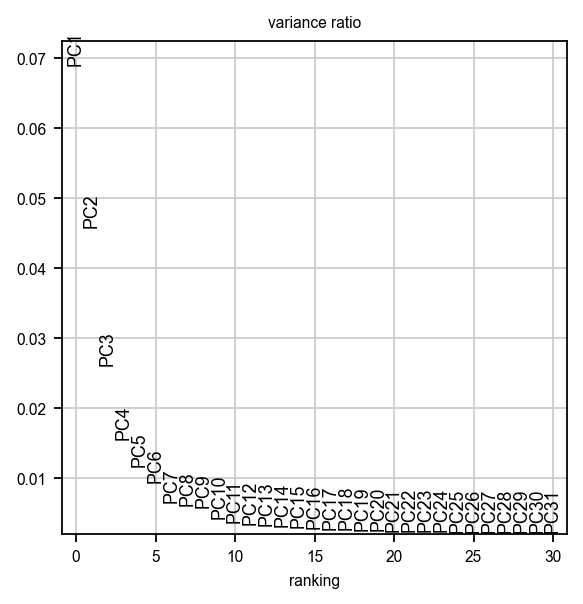

In [7]:

sc.tl.pca(adata, svd_solver='auto')
sc.pl.pca(adata, color='sample',save='_pca_sample')
sc.pl.pca_variance_ratio(adata, log=False,save='_elbow')

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


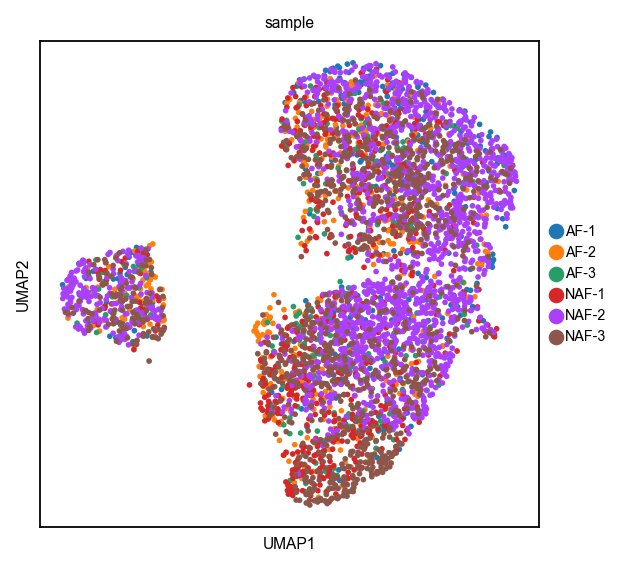

In [8]:
sc.pp.neighbors(adata, n_neighbors=30, n_pcs=8)

sc.tl.umap(adata)
sc.pl.umap(adata, color=['sample'])


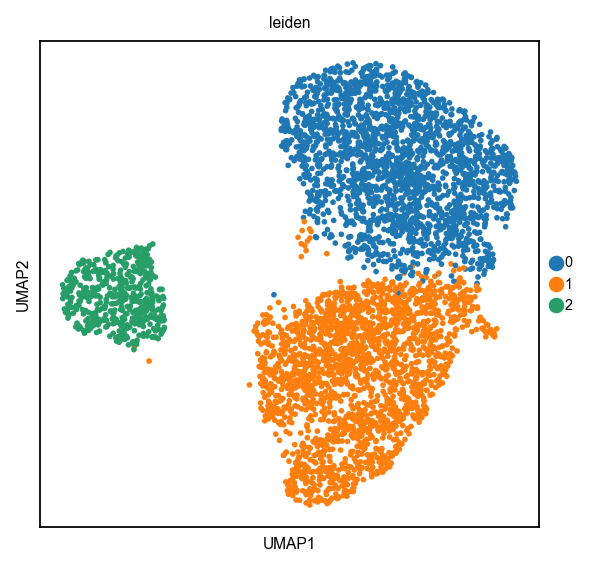

In [9]:
sc.tl.leiden(adata, resolution=0.1)
sc.pl.umap(adata, color=['leiden'])

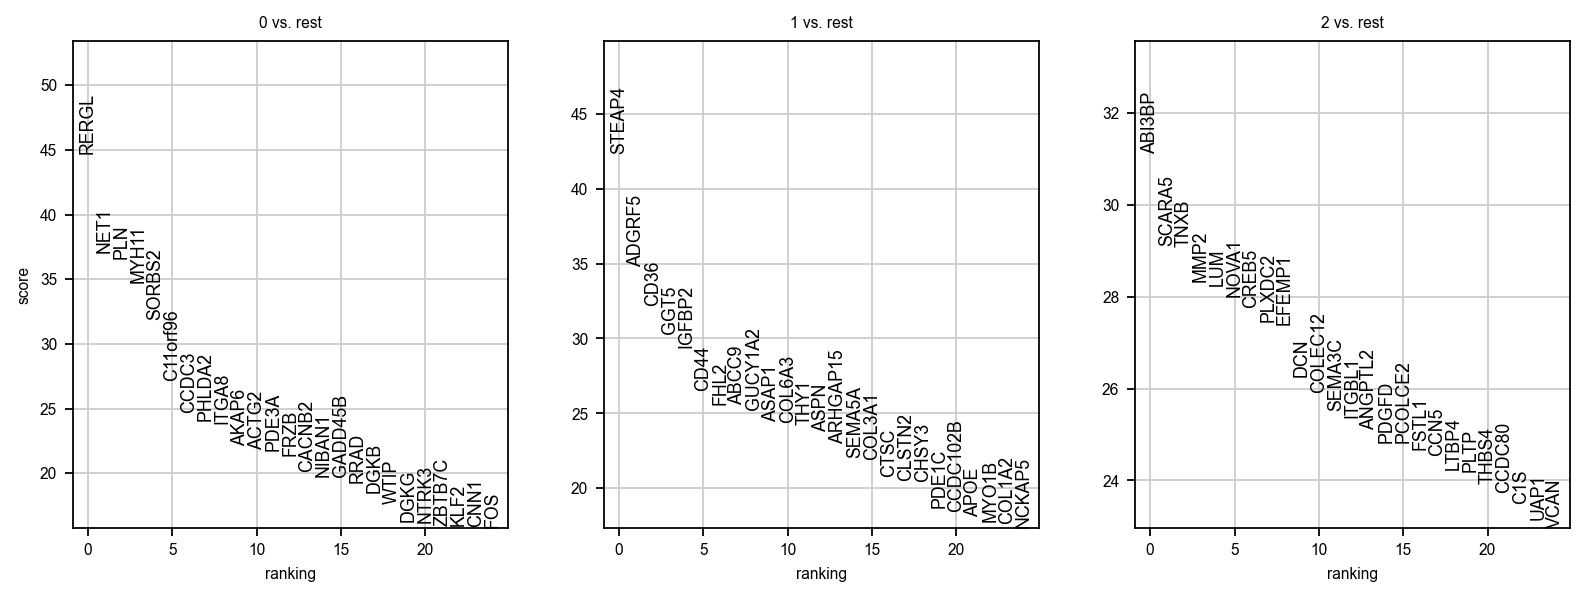

In [10]:

sc.tl.rank_genes_groups(adata, 'leiden', method='wilcoxon')

sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

In [11]:

result1 = adata.uns['rank_genes_groups']
groups = result1['names'].dtype.names
hvgdf = pd.DataFrame(
    {group + '_' + key: result1[key][group]
     for group in groups 
     for key in ['names', 'pvals','logfoldchanges']})
hvgdf.to_excel('./DEG/DEG_vsmc.xlsx')

In [12]:
sc.tl.dendrogram(adata,groupby='leiden')

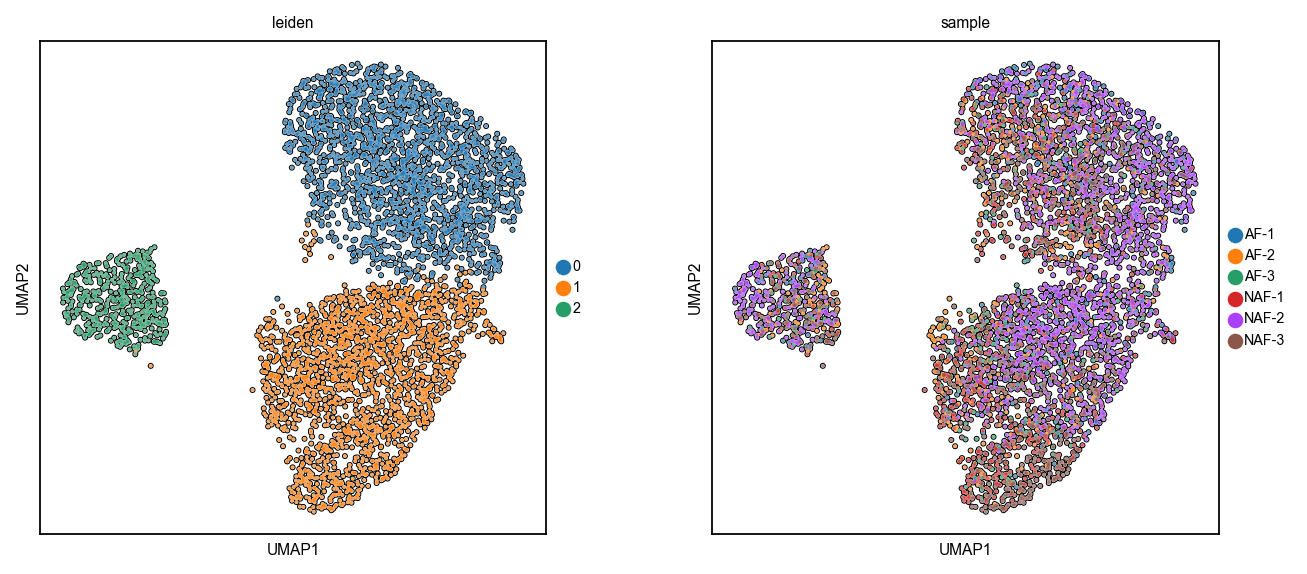

/Users/ckw/opt/anaconda3/envs/ckw/lib/python3.10/site-packages/scanpy/plotting/_anndata.py:2414: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  obs_tidy.index.value_counts(sort=False).iteritems()


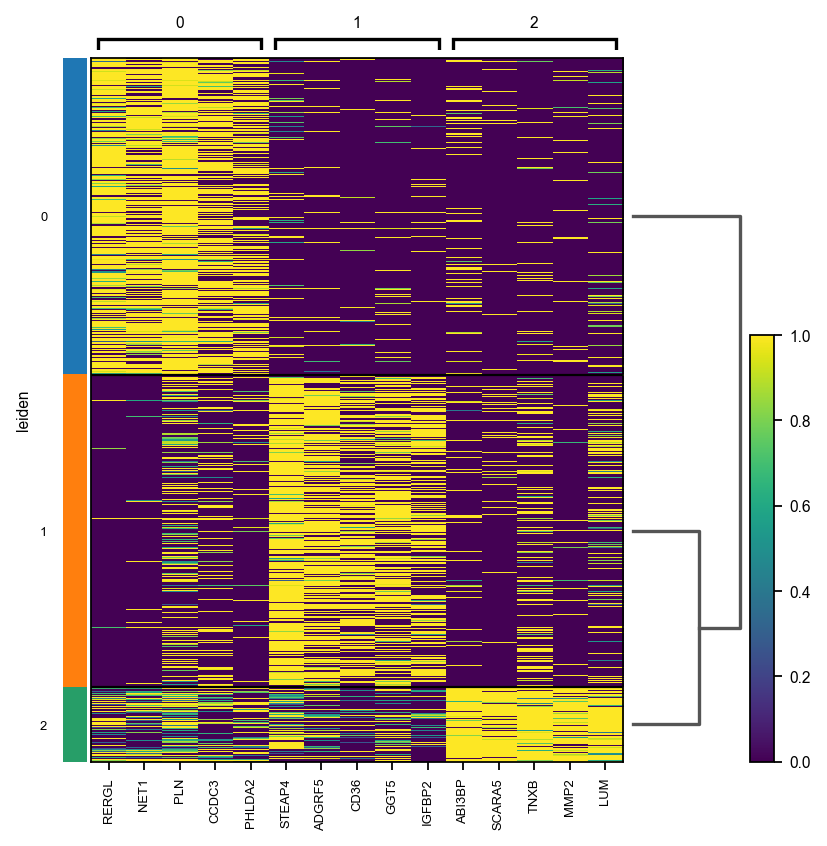

In [13]:
sc.pl.umap(adata, color=['leiden','sample'],save='_VSMC_leiden_cluster',add_outline=True,size=10)
sc.tl.dendrogram(adata,groupby='leiden')
sc.pl.rank_genes_groups_heatmap(adata, n_genes=5, min_logfoldchange=1.5,standard_scale='var',
                                groupby='leiden',dendrogram=True,
                               save='_VSMC_cluster_heatmap',)


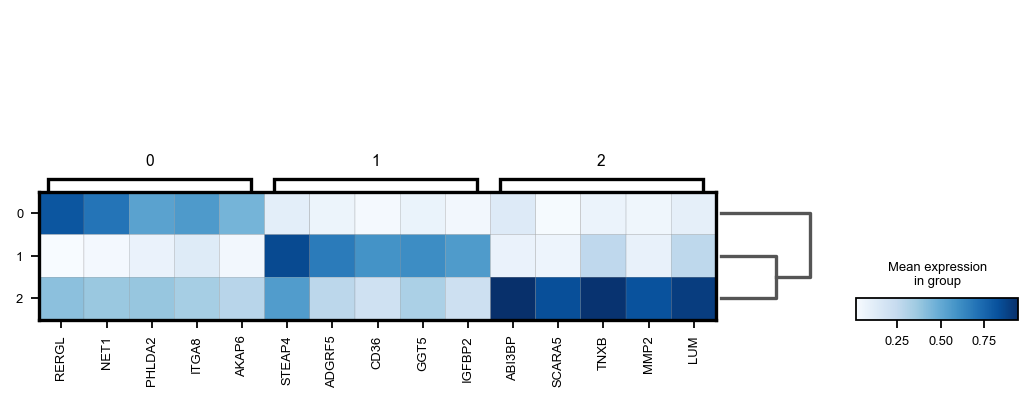

In [14]:
sc.pl.rank_genes_groups_matrixplot(adata, n_genes=5,min_logfoldchange=2, cmap='Blues',groupby='leiden',dendrogram=True)

In [15]:

new_cluster = [
    'VSMC1_0', # 0
    'VSMC2_0', # 1 
    'VSMC3_1', # 2-Endothelial cell


]

In [16]:
adata.rename_categories('leiden', new_cluster)

/Users/ckw/opt/anaconda3/envs/ckw/lib/python3.10/site-packages/anndata/_core/anndata.py:1160: FutureWarning: The `inplace` parameter in pandas.Categorical.rename_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  self.obs[key].cat.rename_categories(categories, inplace=True)


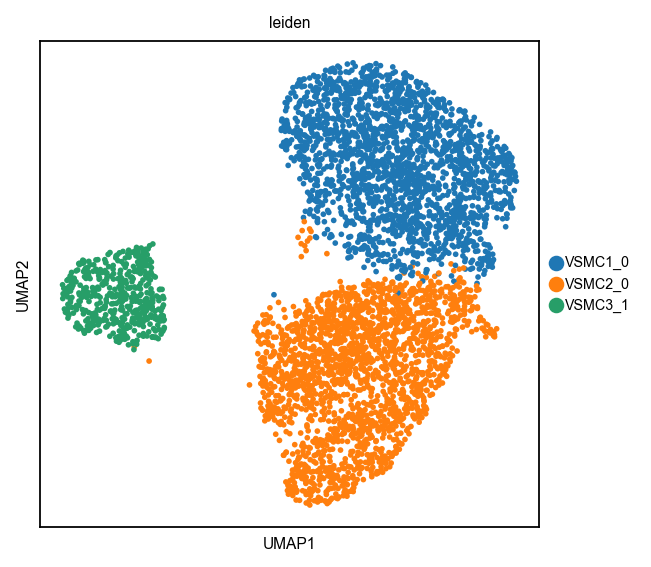

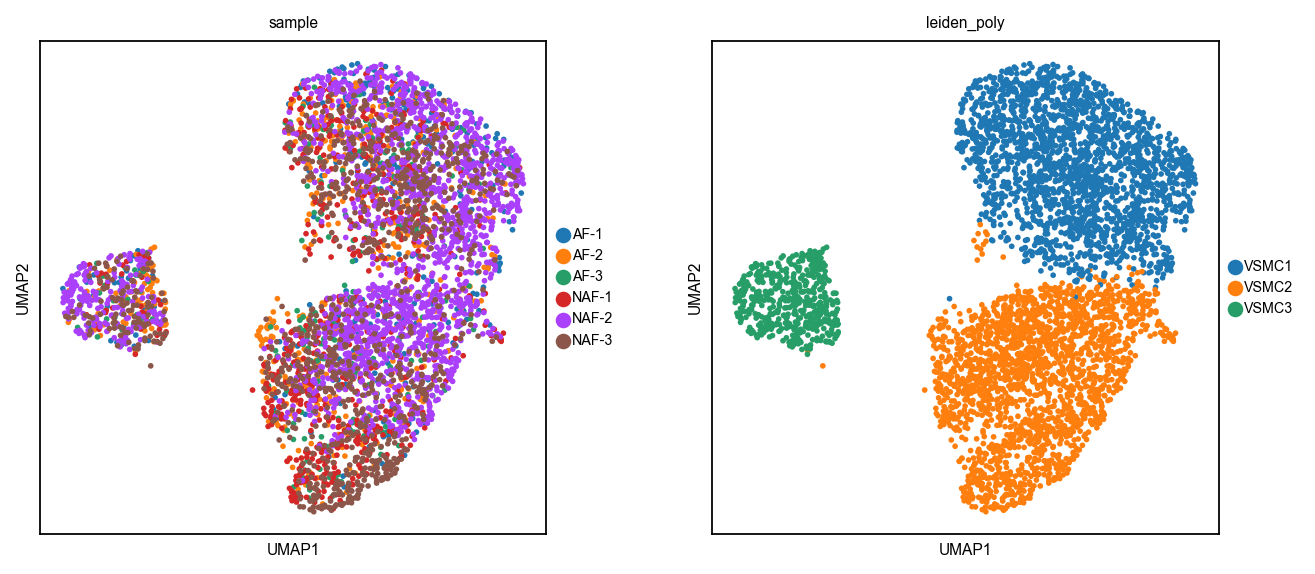

In [17]:
sc.pl.umap(adata, color='leiden')
adata.obs['leiden_poly'] = adata.obs['leiden'].str[:-2]
sc.pl.umap(adata, color=['sample','leiden_poly'])

In [18]:
adata.write('../data/v4-sub-VSMC.h5ad')